In [1]:
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

# Визуализация набора о качестве вина

In [2]:
data_wine = pd.read_csv('red_wine_quality_preprocessed.csv', index_col=0)
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [3]:
data_wine.shape
# 12 признаков и 1599 объектов

(1599, 12)

In [4]:
data_wine.isnull().sum()
# пропуски отсутствуют

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

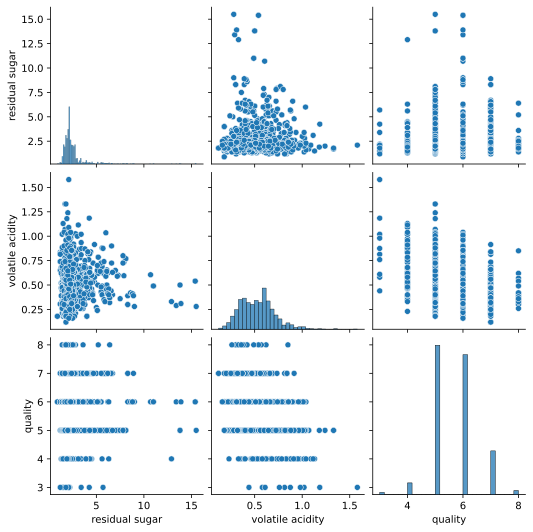

In [5]:
cols = ['residual sugar', 'volatile acidity', 'quality']
sns.pairplot(data_wine[cols], palette='Set1');

Высокое содержание летучих кислот является очагом бактериальной болезни. Информация подтверждается соответствующим графиком: с повышением концентрации летучих кислот в вине, понижается качество самого вина. Высокое содержание остаточного сахара практически гарантирует среднее качество вина.

c:\users\p_rev\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


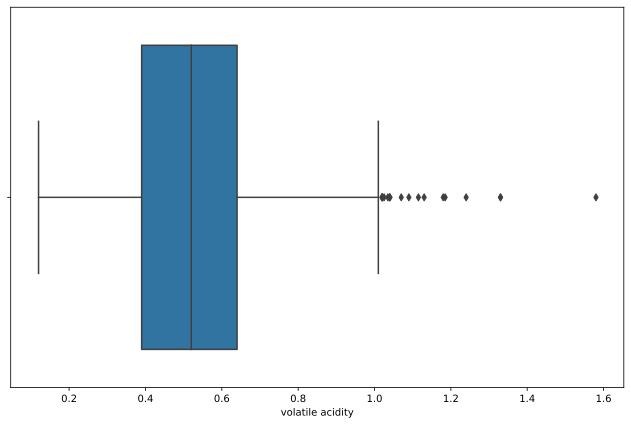

In [6]:
sns.boxplot(data_wine["volatile acidity"]);


Большинство значений летучих кислот приходится на отрезок от 0.4 до 0.6. После 1 можно увидеть множество аномальных значений

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

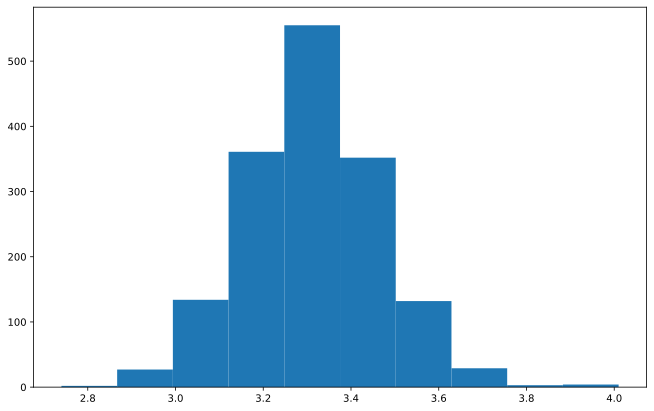

In [7]:
plt.hist(data_wine['pH'])

# Визуализация набора о цементе

In [8]:
data_cem = pd.read_csv('concrete_compressive_strength_preprocessed.csv', index_col=0)
data_cem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


In [9]:
print(data_cem.shape)
# 9 признаков и 1030 объектов
data_cem.isnull().sum()
# пропуски отсутствуют

(1030, 9)


Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

<AxesSubplot:title={'center':'Зависимоcть качества от возраста'}, xlabel='Age', ylabel='Concrete compressive strength'>

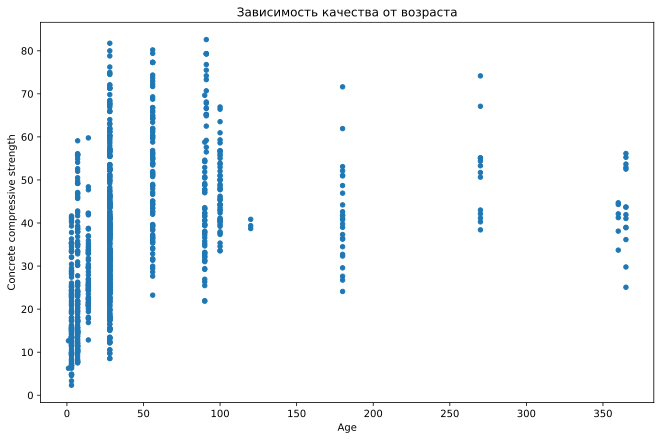

In [10]:
data_cem.plot(kind='scatter', x='Age', y='Concrete compressive strength', title='Зависимоcть качества от возраста')

Для достижения наибольшей прочности цементу необходимо пролежать около месяца. Спустя полгода прочность снижается.

c:\users\p_rev\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


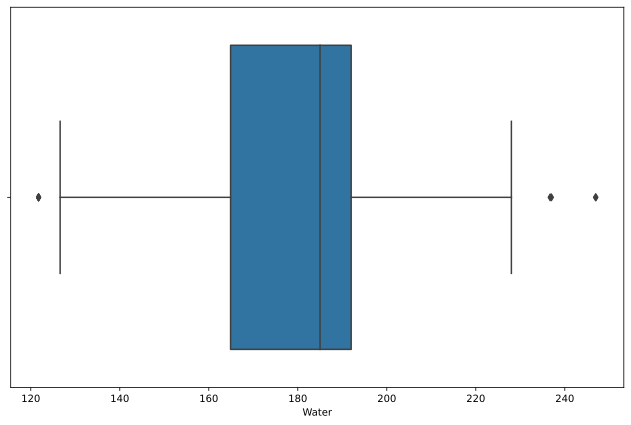

In [11]:
sns.boxplot(data_cem["Water"]);

В среднем используется от 160 до 190 кг/м^3 воды для цемента.

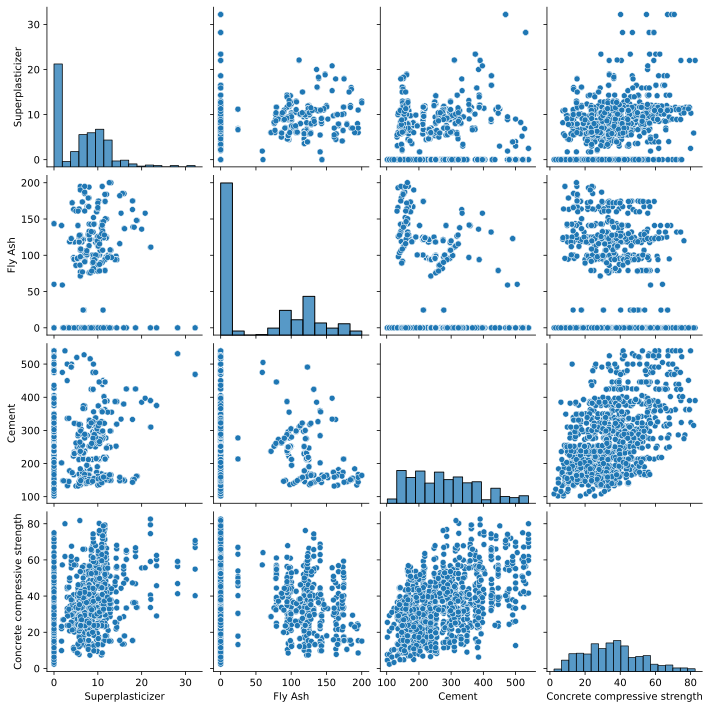

In [12]:
cols_cem = ['Superplasticizer', 'Fly Ash', 'Cement', 'Concrete compressive strength']
sns.pairplot(data_cem[cols_cem], palette='Set1');

Между количеством использованного цемента и его прочностью прослеживается линейная зависимость. С повышением количества цемента на метр кубический увеличивается и его прочность. 